## Missed Trash Pickups

In this data question you will work with service request data related to missed trash pickups from [hubNashville](https://hub.nashville.gov), Metro Nashville government's comprehensive customer service system.

Your goal is to practice working with dates, times, and time-based aggregation in pandas while exploring patterns in missed pickups. You’ll also calculate fines based on missed pickups within a rolling time window.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
th_report = pd.read_csv('data/trash_hauler_report_with_lat_lng.csv')
th_report

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


**Step 1: Data Preparation**
1. Convert any date columns to datetime using pd.to_datetime(). 

In [45]:
th_report['Date Opened'] = pd.to_datetime(th_report['Date Opened'],
                                           format = "%m/%d/%Y")

In [46]:
th_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Request Number    20226 non-null  int64         
 1   Date Opened       20226 non-null  datetime64[ns]
 2   Request           20226 non-null  object        
 3   Description       20195 non-null  object        
 4   Incident Address  20217 non-null  object        
 5   Zip Code          20151 non-null  float64       
 6   Trash Hauler      19325 non-null  object        
 7   Trash Route       19279 non-null  object        
 8   Council District  20177 non-null  float64       
 9   State Plan X      20198 non-null  float64       
 10  State Plan Y      20198 non-null  float64       
 11  LONGITUDE         20198 non-null  float64       
 12  LATITUDE          20198 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 2.0+ MB


In [47]:
print(th_report.dtypes)


Request Number               int64
Date Opened         datetime64[ns]
Request                     object
Description                 object
Incident Address            object
Zip Code                   float64
Trash Hauler                object
Trash Route                 object
Council District           float64
State Plan X               float64
State Plan Y               float64
LONGITUDE                  float64
LATITUDE                   float64
dtype: object


**Step 1: Data Preparation**
1. Convert any date columns to datetime using pd.to_datetime().  
2. Create new columns for:  
    * year, month, day
    * day_of_week (or weekday name)

In [48]:
th_report['year'] = th_report['Date Opened'].dt.year
th_report['month'] = th_report['Date Opened'].dt.month
th_report['day'] = th_report['Date Opened'].dt.day
th_report['day_of_week'] = th_report['Date Opened'].dt.day_name()

In [49]:
th_report.head(5)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,year,month,day,day_of_week
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,2017,11,1,Wednesday
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,2017,11,1,Wednesday
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,2017,11,1,Wednesday
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,2017,11,1,Wednesday
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,2017,11,1,Wednesday


In [50]:
print(th_report['Description'].value_counts())

Description
miss                                                                                             899
Missed.                                                                                          602
missed                                                                                           335
1 cart                                                                                           325
cart still out                                                                                   314
                                                                                                ... 
Trash was not picked up on 10/29 and the trash cans were on the curb at the appropriate time.      1
curb trash/missed Thursday {also neighbor}                                                         1
missed 102 marshall court as well                                                                  1
TRASH NOT PICKED UP  AGAIN/ CALLER VERY UPSET/ THIS IS FOR TITTLE MAX          

In [51]:
th_report['Request'] = th_report['Request'].replace({
    r'(?i)(miss(ed)?\s*pickup)': 'missed pickup',
}, regex=True)


In [52]:
th_report


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,year,month,day,day_of_week
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,2017,11,1,Wednesday
1,25274,2017-11-01,Trash - Curbside/Alley missed pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,2017,11,1,Wednesday
2,25276,2017-11-01,Trash - Curbside/Alley missed pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,2017,11,1,Wednesday
3,25307,2017-11-01,Trash - Curbside/Alley missed pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,2017,11,1,Wednesday
4,25312,2017-11-01,Trash - Curbside/Alley missed pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,2017,11,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley missed pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130,2019,11,1,Friday
20222,267126,2019-11-01,Trash - Curbside/Alley missed pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482,2019,11,1,Friday
20223,267130,2019-11-01,Trash - Curbside/Alley missed pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643,2019,11,1,Friday
20224,267134,2019-11-01,Trash - Curbside/Alley missed pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637,2019,11,1,Friday


3. Filter the data so that you are only analyzing actual missed pickups.

In [53]:
missed_pickups = th_report[th_report['Request'].str.contains("missed pickup", case=False, na=False)].copy()


In [54]:
missed_pickups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15028 entries, 1 to 20225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Request Number    15028 non-null  int64         
 1   Date Opened       15028 non-null  datetime64[ns]
 2   Request           15028 non-null  object        
 3   Description       14999 non-null  object        
 4   Incident Address  15020 non-null  object        
 5   Zip Code          14972 non-null  float64       
 6   Trash Hauler      14422 non-null  object        
 7   Trash Route       14405 non-null  object        
 8   Council District  14991 non-null  float64       
 9   State Plan X      15007 non-null  float64       
 10  State Plan Y      15007 non-null  float64       
 11  LONGITUDE         15007 non-null  float64       
 12  LATITUDE          15007 non-null  float64       
 13  year              15028 non-null  int32         
 14  month             15028 non

In [55]:
missed_pickups.head(5)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,year,month,day,day_of_week
1,25274,2017-11-01,Trash - Curbside/Alley missed pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,2017,11,1,Wednesday
2,25276,2017-11-01,Trash - Curbside/Alley missed pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,2017,11,1,Wednesday
3,25307,2017-11-01,Trash - Curbside/Alley missed pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,2017,11,1,Wednesday
4,25312,2017-11-01,Trash - Curbside/Alley missed pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,2017,11,1,Wednesday
8,25330,2017-11-01,Trash - Curbside/Alley missed pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728,2017,11,1,Wednesday


**Step 2: Explore Time-Based Patterns**  
Answer these simpler questions first:  
1. Which day of the week has the highest number of missed pickups?
2. Missed pickups over time: 

In [56]:
missed_pickups.loc[:, 'day_of_week'] = missed_pickups['Date Opened'].dt.day_name()

In [57]:
day_counts = missed_pickups['Date Opened'].value_counts()
day_counts

Date Opened
2019-08-02    237
2019-10-18    171
2019-08-16    158
2019-10-16    148
2019-10-17    145
             ... 
2018-12-25      1
2019-01-13      1
2018-01-15      1
2019-09-22      1
2017-12-23      1
Name: count, Length: 680, dtype: int64

In [58]:
highest_missed_day = day_counts.idxmax()
highest_missed_day

Timestamp('2019-08-02 00:00:00')

In [59]:
highest_missed_count = day_counts.max()
highest_missed_count

237

 * Find the total number of missed pickups by month. Plot this with a line chart. 

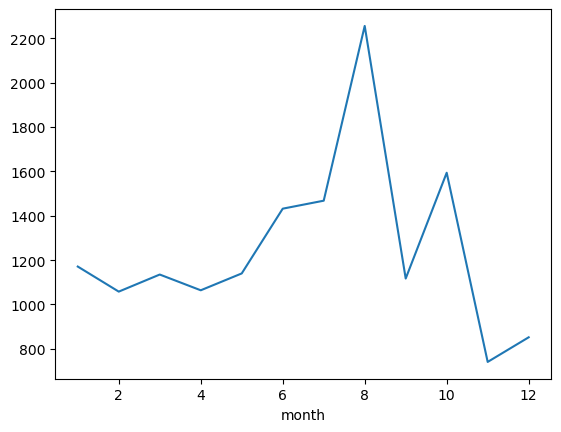

In [60]:
missed_pickups['month'] = missed_pickups['Date Opened'].dt.month
missed_pickups.groupby('month').size().plot();

* Create a plot showing the number of missed pickups per day.  

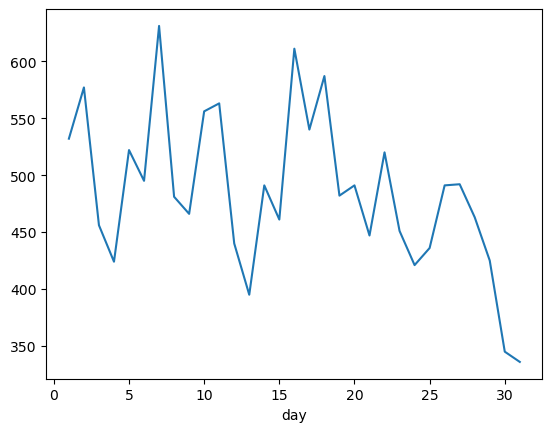

In [61]:
missed_pickups['day'] = missed_pickups['Date Opened'].dt.day
missed_pickups.groupby('day').size().plot();

* Compute a rolling 30-day average of daily missed pickups. Visualize your results with a line chart to see trends.


In [62]:
missed_pickups_per_day = missed_pickups.groupby('Date Opened').size().reset_index()
missed_pickups_per_day.columns = ['day', 'Missed']
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day']).copy()
missed_pickups_per_day.head()

,day,Missed
0,2017-11-01,25
1,2017-11-02,29
2,2017-11-03,19
3,2017-11-05,2
4,2017-11-06,21


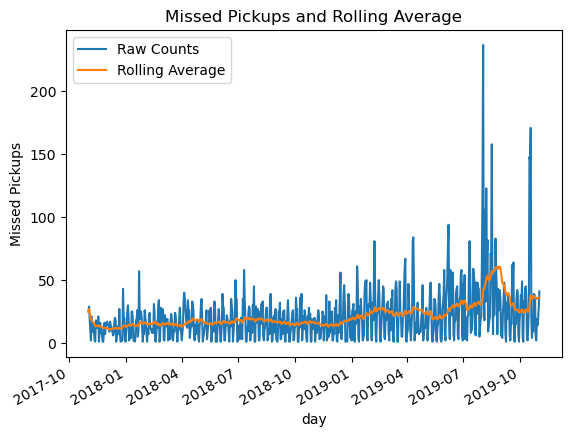

In [63]:
missed_pickups_per_day['rolling_30D'] = missed_pickups_per_day.rolling(window = '30D', on='day')['Missed'].mean()
ax = missed_pickups_per_day.plot(x='day', y='Missed', label= 'Raw Counts')
missed_pickups_per_day.plot(x='day', y='rolling_30D', label= 'Rolling Average', ax=ax);
ax.set_ylabel('Missed Pickups')
ax.set_title('Missed Pickups and Rolling Average')
plt.show()

**Step 3: Main Task – 180-Day Rolling Fine Calculation**  
Metro Nashville charges fines for excessive missed trash pickups. It uses the following method to calculate the total fine:  A $1500 fine is charged for each missed pickup that is the third or subsequent one at the same address within a 180-day window. Multiple fines may apply to the same address.  
What is the total fine across all addresses? **Hint:** The rolling method can be use in combination with groupby.

In [64]:
missed_pickups_per_day = missed_pickups.groupby(['Date Opened', 'Incident Address']).size().reset_index()
missed_pickups_per_day.columns = ['day', 'Incident Address', 'Missed']
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day'])
missed_pickups_per_day.head()

,day,Incident Address,Missed
0,2017-11-01,1144 Sewanee Rd,1
1,2017-11-01,117 Lafayette Ct,1
2,2017-11-01,1206 Ireland St,1
3,2017-11-01,131 page rd,1
4,2017-11-01,1815 WOODMONT BLVD,1


In [65]:
missed_pickups_per_day['day'] = pd.to_datetime(missed_pickups_per_day['day'])
missed_pickups_per_day.set_index('day', inplace=True)
missed_count = (
    missed_pickups_per_day.groupby('Incident Address')['Missed']
    .rolling('180D', min_periods=1)
    .sum()
)

missed_count = missed_count.reset_index()

missed_count.rename(columns={'Missed': 'missed_count'}, inplace=True)

missed_pickups_per_day = missed_pickups_per_day.reset_index()  
missed_pickups_per_day = missed_pickups_per_day.merge(missed_count, on=['day', 'Incident Address'], how='left')
missed_pickups_per_day.drop(columns=['Missed'], inplace=True)
missed_pickups_per_day['fines'] = 0
missed_pickups_per_day.loc[missed_pickups_per_day['missed_count'] > 2, 'fines'] = (
    (missed_pickups_per_day['missed_count'] - 2) * 1500
)

total_fine = missed_pickups_per_day['fines'].sum()

print(f'Total Fine: {total_fine}')

missed_pickups_per_day

Total Fine: 3436500


,day,Incident Address,missed_count,fines
0,2017-11-01,1144 Sewanee Rd,1.0,0
1,2017-11-01,117 Lafayette Ct,1.0,0
2,2017-11-01,1206 Ireland St,1.0,0
3,2017-11-01,131 page rd,1.0,0
4,2017-11-01,1815 WOODMONT BLVD,1.0,0
...,...,...,...,...
14776,2019-11-01,"750 S 5th St, Nashville, TN 37206, United States",2.0,0
14777,2019-11-01,"801 E Campbell Rd, Madison, Tennessee, 37115",2.0,0
14778,2019-11-01,"816 E Campbell Rd, Madison, Tennessee, 37115",1.0,0
14779,2019-11-01,"846 E Meade Ave, Nashville, TN 37115, United S...",5.0,4500
